<a href="https://colab.research.google.com/github/yeesem/Natural-Laguage-Processing/blob/main/Binary_Classifier_with_the_Sarcasm_Datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2024-04-15 03:23:52--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2024-04-15 03:23:52 (83.5 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
  datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [3]:
# Hyperparameters
training_size = 20000
vocab_size = 10000
max_length = 32
embedding_dim = 16

In [4]:
# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [19]:
# Preprocessing the train and test sets
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

# Initialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size,oov_token = oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate sequence and pad for training set
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen = max_length,truncating = trunc_type,padding = padding_type)

# Generate sequence and pad for testing set
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length,truncating = trunc_type,padding = padding_type)

# Convert the labels lists into numpy array
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [20]:
# Build and compile the model
import tensorflow as tf

# Initialize a GlobalAveragePooling1D layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define the sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_4  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Compile the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [23]:
num_epochs = 30

history = model.fit(
    training_padded,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_padded,testing_labels)
)

Epoch 1/30
625/625 [==============================] - 5s 7ms/step - loss: 0.5792 - accuracy: 0.6942 - val_loss: 0.4070 - val_accuracy: 0.8314
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 0.3211 - accuracy: 0.8707 - val_loss: 0.3429 - val_accuracy: 0.8557
Epoch 3/30
625/625 [==============================] - 4s 7ms/step - loss: 0.2407 - accuracy: 0.9062 - val_loss: 0.3417 - val_accuracy: 0.8580
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1957 - accuracy: 0.9240 - val_loss: 0.3538 - val_accuracy: 0.8538
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 0.1628 - accuracy: 0.9403 - val_loss: 0.3805 - val_accuracy: 0.8527
Epoch 6/30
625/625 [==============================] - 4s 6ms/step - loss: 0.1383 - accuracy: 0.9502 - val_loss: 0.4105 - val_accuracy: 0.8477
Epoch 7/30
625/625 [==============================] - 8s 12ms/step - loss: 0.1184 - accuracy: 0.9601 - val_loss: 0.4401 - val_accuracy: 0.8462
Epoch

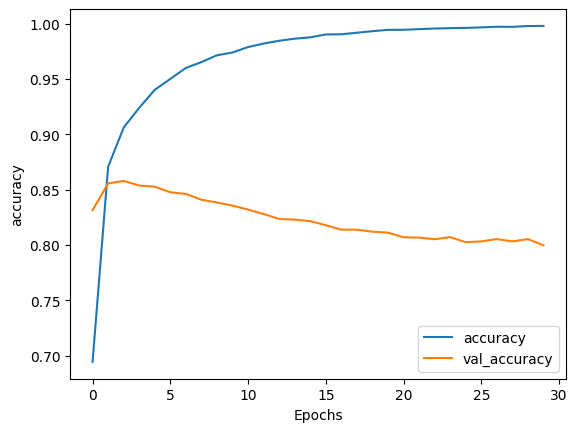

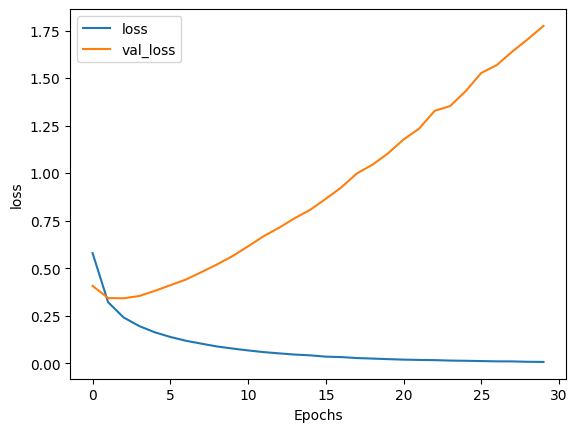

In [24]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_" + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history,'accuracy')
plot_graphs(history,'loss')